In [1]:
model = 'transvae'
d_model = 128
d_feedforward = 128
d_latent = 64
data_source = 'peptide'
epochs = 1
hardware = 'cpu'
property_predictor = 'ON'
type_property_predictor = 'deep_net'
train_props_path = 'data\\function_train.txt'
test_props_path = 'data\\function_test.txt'
#DDP
init_method = 'file:///D:/libtmp/file'
dist_backend = 'gloo' #on windows NCCL not supported
DDP = 'OFF' #ON or OFF
%run scripts/train.py --model $model --d_model $d_model --d_feedforward $d_feedforward --d_latent $d_latent --data_source $data_source --epochs $epochs --hardware $hardware --init_method $init_method --dist_backend $dist_backend --DDP $DDP --property_predictor $property_predictor --type_property_predictor $type_property_predictor --train_props_path $train_props_path --test_props_path $test_props_path


main function called /n
train_parser function called /n
train function called /n
parser model_init called /n
trans1x-128_peptide
trans1x-128_peptide


G:\Anaconda\envs\amp21\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


KeyboardInterrupt: 

<module 'matplotlib.pyplot' from 'G:\\Anaconda\\envs\\amp21\\lib\\site-packages\\matplotlib\\pyplot.py'>

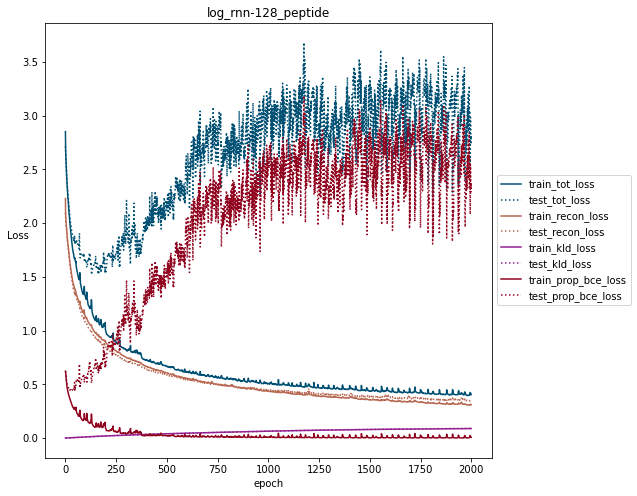

In [8]:
from transvae import analysis
#loss ploting
src = 'checkpointz//rnn_amp//1_16_2022//log_rnn-128_peptide.txt'
analysis.plot_loss_by_type(src)#, loss_type = 'kld_loss', data_type='test')

In [2]:
#extracting attention weights
%run scripts/attention.py --model transvae --model_ckpt checkpointz\\trans_amp\\2000_trans1x-128_peptide.ckpt --mols notebooks\\example_data\\peptides.txt --save_path "attn_weights"

attn parser function called /n
None


G:\GitHub\MSCSAM_TBD\main_model\transvae\trans_models.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.params['CHAR_WEIGHTS'] = torch.tensor(self.params['CHAR_WEIGHTS'], dtype=torch.float)


AssertionError: EGFQLMDRGTFDEIGR could not be joined